In [6]:
import pandas as pd

df: pd.DataFrame = pd.read_csv('data/sentiment_analysis.csv')
corpus = df['text']

## Introduction to NLP

NLP (Natural Language Processing) is all about enabling computers to understand, interpret, and work with human language in a meaningful way. Think about things like sentiment analysis, machine translation, chatbots, or information retrieval—NLP powers all these applications and more.

## Basic Text Processing

### Tokenization

Tokenization is breaking text into smaller pieces, like sentences or words. It’s one of the first steps in processing language data.

- **Sentence Tokenization**: Splits text into sentences.  
- **Word Tokenization**: Splits sentences into words. 


In [2]:
from nltk.tokenize import NLTKWordTokenizer

tokenizer = NLTKWordTokenizer()
tokens = tokenizer.tokenize_sents(corpus[0:2])

print(corpus[0:2])
print(tokens)

0             What a great day!!! Looks like dream.
1    I feel sorry, I miss you here in the sea beach
Name: text, dtype: object
[['What', 'a', 'great', 'day', '!', '!', '!', 'Looks', 'like', 'dream', '.'], ['I', 'feel', 'sorry', ',', 'I', 'miss', 'you', 'here', 'in', 'the', 'sea', 'beach']]


### NLP Encodings

Natural Language Processing (NLP) often relies on transforming text into numerical representations to enable computational analysis. Below, we discuss five common encoding methods, their differences, advantages, and disadvantages.

#### 1. One-Hot Encoding
One-Hot Encoding represents each unique word or character as a binary vector where only one position is set to 1, and all others are 0. For example, in a vocabulary of {"cat", "dog", "fish"}, "dog" would be `[0, 1, 0]`.

**Advantages:**
- Simple and intuitive.
- Suitable for small vocabularies.

**Disadvantages:**
- Inefficient for large vocabularies due to high dimensionality.
- No notion of similarity between words.

#### 2. Label Encoding
Label Encoding assigns a unique integer to each word or token. For example, {"cat": 0, "dog": 1, "fish": 2}.

**Advantages:**
- Memory-efficient compared to one-hot encoding.
- Easy to implement.

**Disadvantages:**
- Imposes an arbitrary ordering that may mislead learning models.
- Cannot represent relationships between words.

#### 3. Character Encoding
Character Encoding represents text at the character level, breaking words into their individual characters (e.g., `"cat"` becomes `['c', 'a', 't']`).

**Advantages:**
- Useful for handling out-of-vocabulary (OOV) words.
- Compact representations for smaller alphabets.

**Disadvantages:**
- Loses word-level semantic information.
- May result in longer sequences for processing.

#### 4. Byte Pair Encoding (BPE)
BPE is a subword tokenization method that splits words into frequent subword units. For instance, `"unhappiness"` might become `["un", "happy", "ness"]`.

**Advantages:**
- Handles OOV words effectively by breaking them into subwords.
- Balances vocabulary size and sequence length.

**Disadvantages:**
- Computationally intensive preprocessing.
- Requires fine-tuning of vocabulary size for optimal results.

#### 5. Hash Encoding
Hash Encoding maps tokens to fixed-size vectors using hash functions, ensuring a fixed vocabulary size without explicitly storing the vocabulary.

**Advantages:**
- Memory-efficient for large datasets.
- Avoids the need for a pre-defined vocabulary.

**Disadvantages:**
- Risk of collisions (different tokens mapped to the same vector).
- Loses interpretability compared to explicit encodings.


### Comparison

- **Dimension:** One-hot encoding produces high-dimensional vectors, while label encoding and hash encoding are low-dimensional.
- **Scalability:** One-hot encoding struggles with large vocabularies, whereas BPE and hash encoding scale better.
- **Context Representation:** Character encoding and BPE better handle OOV scenarios compared to one-hot or label encoding.
- **Efficiency:** Hash encoding is most efficient in terms of memory and processing but risks information loss.

Understanding these encoding methods and their trade-offs helps in selecting the right approach based on the NLP task’s requirements.

## Text Vectorization

Text Vectorization The techniques which convert text into features are generally known as "Text Vectorization techniques", because they all aim to convert text into vectors (array) that can then be fed to a machine learning model.

| Sentence                  | Tokens                               | One-Hot Encoding Vector |
|---------------------------|--------------------------------------|--------------------------|
| "The cat sat in the hat"  | ["The", "cat", "sat", "in", "hat"] | [1, 1, 1, 1, 1, 0, 0]    |
| "The cat with the hat"    | ["The", "cat", "with", "the", "hat"] | [1, 1, 0, 0, 1, 1, 1]  |

This is an example of Text vectorization using One-Hot Encoding

In [3]:
vocabulary = sorted(set(word for sentence in tokens for word in sentence))
print(f'Vocabulary: {vocabulary} \n{"-"*20}')

print('Sentence 0:',tokens[0])
print('Vector 0:',[1 if word in tokens[0] else 0 for word in vocabulary])

print('Sentence 1:',tokens[1])
print('Vector 1:',[1 if word in tokens[1] else 0 for word in vocabulary])

Vocabulary: ['!', ',', '.', 'I', 'Looks', 'What', 'a', 'beach', 'day', 'dream', 'feel', 'great', 'here', 'in', 'like', 'miss', 'sea', 'sorry', 'the', 'you'] 
--------------------
Sentence 0: ['What', 'a', 'great', 'day', '!', '!', '!', 'Looks', 'like', 'dream', '.']
Vector 0: [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Sentence 1: ['I', 'feel', 'sorry', ',', 'I', 'miss', 'you', 'here', 'in', 'the', 'sea', 'beach']
Vector 1: [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


### Part-of-Speech (POS) Tagging

Assigns parts of speech (e.g., noun, verb, adjective) to each word.

![Pasted image 20241109035814.png](<attachment:Pasted image 20241109035814.png>)
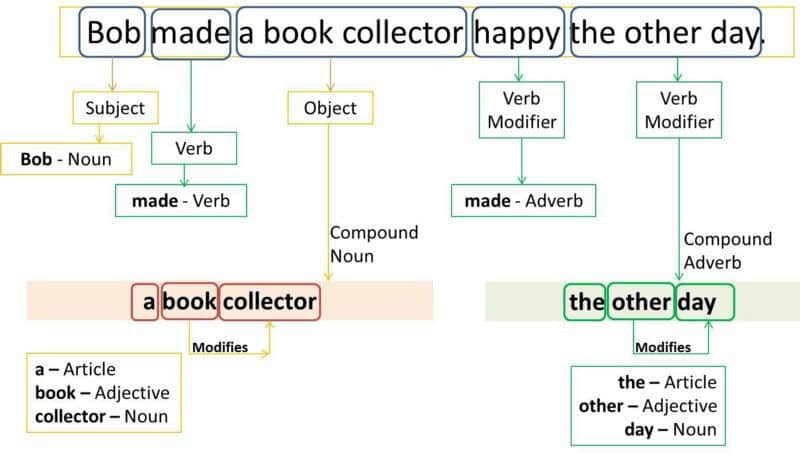

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')

from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

print("John's big idea isn't all that bad :",pos_tag(word_tokenize("John's big idea isn't all that bad.")) )

print("John's big idea isn't all that bad :", pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal'))

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Riyadh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Riyadh\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


John's big idea isn't all that bad : [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'), ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
John's big idea isn't all that bad : [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'), ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]


### Text Normalization

Text normalization is a key step in preparing raw text data for analysis. It involves transforming text into a consistent format, making it easier for models to interpret and analyze. This process reduces noise and variability, ensuring that different forms of the same word or expression are treated consistently in NLP tasks.

![Pasted image 20241021005733.png](<attachment:Pasted image 20241021005733.png>)

A **text preprocessing pipeline** cleans and standardizes text by **lowercasing**, **removing repetitions and punctuation**, and **normalizing words** with stemming or lemmatization. This improves consistency and prepares the text for NLP tasks.
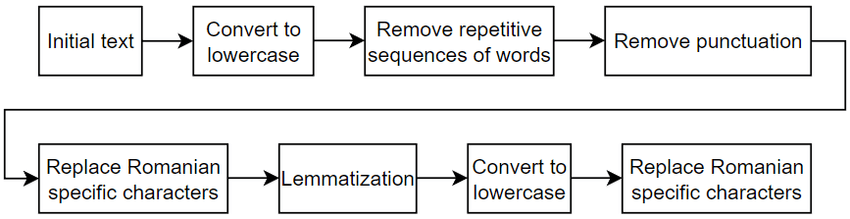

#### To lower case

In [5]:
corpus[0].lower()

'what a great day!!! looks like dream.'

#### Remove repetitive sequence of words

In [6]:
corpus[167]

'writing report cards  soooo tired but what an amazing day. check it out on fb soon!'

In [7]:
import re

re.sub(r"(.)\1{2,}", r"\1", corpus[167])

'writing report cards  so tired but what an amazing day. check it out on fb soon!'

#### Special Characters removal

In [8]:
# using regex to remove unwanted chars bt negating the selected chars
re.sub(r'[^a-zA-Z ]', '', corpus[0])

'What a great day Looks like dream'

#### Lemmatization & Stemming

![Pasted image 20241021005855.png](<attachment:Pasted image 20241021005855.png>)


These techniques simplify vocabulary and reduce feature size, but they impact the **accuracy of word meaning** and can affect the **contextual interpretation**. For example, stemming may group words too aggressively, leading to errors in sentiment analysis, while lemmatization maintains more semantic clarity.

| Technique         | Pros                                                          | Cons                                                                 |
| ----------------- | ------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Stemming**      | - Faster, computationally light                               | - Less accurate, may distort meaning (e.g., "universal" → "univers") |
| **Lemmatization** | - More accurate, retains meaning (e.g., "am, are, is" → "be") | - Slower, requires more computation and linguistic resources         |
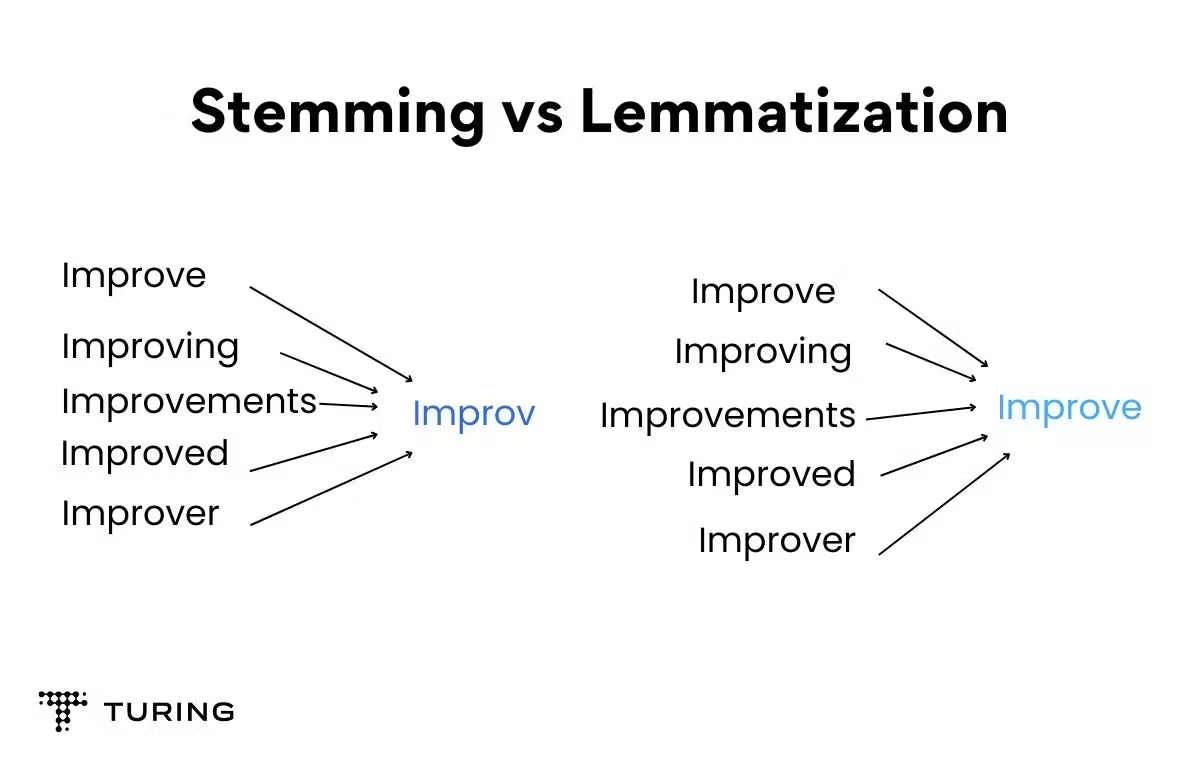

##### Lemmatization

In [9]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [10]:
corpus[167].split(' ')[2]

'cards'

In [39]:
lemmatizer.lemmatize(corpus[167].split(' ')[2])

NameError: name 'lemmatizer' is not defined

##### Stemming

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [13]:
corpus[167]

'writing report cards  soooo tired but what an amazing day. check it out on fb soon!'

In [14]:
stemmer.stem(corpus[167].split(' ')[9]) # amazing

'amaz'

### Stopwords

**Stopwords** are common words in a language, such as "the," "is," "in," and "and," which typically carry minimal semantic value and do not contribute significantly to the meaning of the text. In natural language processing (NLP), removing stopwords is a common preprocessing step to reduce the noise in text data, allowing models to focus on more meaningful terms.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [4]:
stopwords = stopwords.words('english')

In [10]:
text = [t for t in corpus[167].split() if t not in stopwords]
print("Text before stopwords removal:\n",corpus[167].split())
print("Text after stopwords removal:\n", text)

Text before stopwords removal:
 ['writing', 'report', 'cards', 'soooo', 'tired', 'but', 'what', 'an', 'amazing', 'day.', 'check', 'it', 'out', 'on', 'fb', 'soon!']
Text after stopwords removal:
 ['writing', 'report', 'cards', 'soooo', 'tired', 'amazing', 'day.', 'check', 'fb', 'soon!']



#### Why Remove Stopwords?
- **Enhances Model Efficiency**: Removing stopwords reduces the vocabulary size, making the model more efficient and reducing computational costs.
- **Improves Relevance**: Helps to focus on words with higher semantic importance, which can lead to better model accuracy in tasks like text classification, search relevance, and topic modeling.

Stopwords removal is generally useful but should be carefully applied based on the context, as some stopwords may carry meaning in specific tasks, like sentiment analysis.


## Word Embeddings

Word embeddings are a way of representing words as vectors in a multi-dimensional space, where the distance and direction between vectors reflect the similarity and relationships among the corresponding words.

### Two approaches to word embeddings

#### Frequency-based embeddings

Frequency-based embeddings refer to word representations that are derived from the frequency of words in a corpus. These embeddings are based on the idea that the importance or significance of a word can be inferred from how frequently it occurs in the text.

##### Bag-of-words (binary)

Bag-of-words model is a way of representing text data when modeling text with machine learning algorithms. Machine learning algorithms cannot work with raw text directly; the text must be converted into well defined fixed-length(vector) numbers.

Example:
1. “The cat sat” 
2. “The cat sat in the hat” 
3. “The cat with the hat”

![Pasted image 20241021005545.png](<attachment:Pasted image 20241021005545.png>)
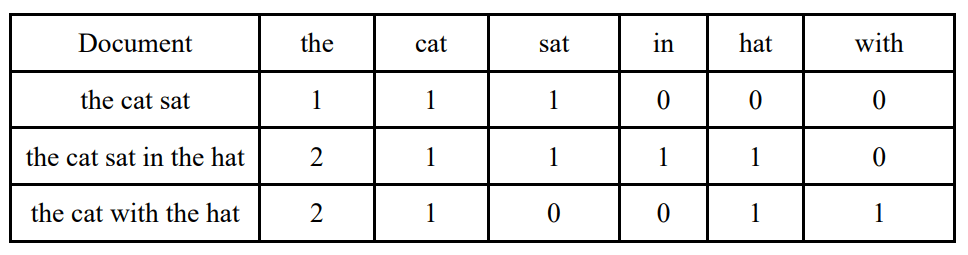


##### Term Frequency-Inverse Document Frequency (TF-IDF)

TF-IDF is used to emphasize words that are common within a specific document but relatively rare across the entire corpus, helping to highlight key terms for each document.

The TF-IDF score for a term is calculated as:

$$
\textit{TF-IDF} = TF \times IDF
$$

$$
\begin{align*}
    \text{Let}\ t&=\text{Term} \\
    \text{Let}\ IDF&=\text{Inverse Document Frequency} \\
    \text{Let}\ TF&=\text{Term Frequency} \\[2em]
    TF \:&=\: \frac{\text{term frequency in document}}{\text{total words in document}} \\[1em]
    IDF(t) \:&=\: \log_e\left(\frac{\text{total documents in corpus}}{\text{documents with term}}\right)
\end{align*}
$$

**Note**: To avoid divide-by-zero errors, add 1 to all counters if a term is absent in the corpus.


##### Step 1: Calculate Term Frequencies (TF)

To find Term Frequency (TF), divide the count of each term by the total number of terms in the document.

Sample documents:

1. **Document 1 (D1)**: "The cat sat" – Total terms: 3
2. **Document 2 (D2)**: "The cat sat in the hat" – Total terms: 6
3. **Document 3 (D3)**: "The cat with the hat" – Total terms: 5

| Term |  TF in Document 1 (D1)   |     TF in Document 2 (D2)      |  TF in Document 3 (D3)  |
| :--: | :----------------------: | :----------------------------: | :---------------------: |
| the  | $$ \frac{1}{3} = 0.33 $$ | $$ \frac{2}{6} \approx 0.33 $$ | $$ \frac{1}{5} = 0.2 $$ |
| cat  | $$ \frac{1}{3} = 0.33 $$ | $$ \frac{1}{6} \approx 0.17 $$ | $$ \frac{1}{5} = 0.2 $$ |
| sat  | $$ \frac{1}{3} = 0.33 $$ | $$ \frac{1}{6} \approx 0.17 $$ |            0            |
|  in  |            0             | $$ \frac{1}{6} \approx 0.17 $$ |            0            |
| hat  |            0             | $$ \frac{1}{6} \approx 0.17 $$ | $$ \frac{1}{5} = 0.2 $$ |
| with |            0             |               0                | $$ \frac{1}{5} = 0.2 $$ |

### Step 2: Calculate Inverse Document Frequency (IDF)

Calculate the IDF for each term using the formula:

$$
IDF(t) = \log_e\left(\frac{\text{total documents in corpus}}{\text{documents with term}}\right)
$$

- **The**: $$\log_e\left(\frac{3}{3}\right) = 0.000$$
- **cat**: $$\log_e\left(\frac{3}{3}\right) = 0.000$$
- **sat**: $$\log_e\left(\frac{3}{2}\right) \approx 0.405$$
- **in**: $$\log_e\left(\frac{3}{1}\right) \approx 1.099$$
- **hat**: $$\log_e\left(\frac{3}{2}\right) \approx 0.405$$
- **with**: $$\log_e\left(\frac{3}{1}\right) \approx 1.099$$

### Step 3: Calculate TF-IDF Scores

Calculate the TF-IDF values for each term in each document by multiplying the TF values from Step 1 with the recalculated IDF values:

| Term  | TF-IDF (D1)            | TF-IDF (D2)            | TF-IDF (D3)            |
|-------|-------------------------|-------------------------|-------------------------|
| The   | $$0.000 \times 0.33 = 0.000$$ | $$0.000 \times 0.33 = 0.000$$ | $$0.000 \times 0.2 = 0.000$$ |
| cat   | $$0.000 \times 0.33 = 0.000$$ | $$0.000 \times 0.17 = 0.000$$ | $$0.000 \times 0.2 = 0.000$$ |
| sat   | $$0.405 \times 0.33 \approx 0.135$$ | $$0.405 \times 0.17 \approx 0.068$$ | $$0.405 \times 0 = 0.000$$ |
| in    | $$1.099 \times 0 = 0.000$$ | $$1.099 \times 0.17 \approx 0.187$$ | $$1.099 \times 0 = 0.000$$ |
| hat   | $$0.405 \times 0 = 0.000$$ | $$0.405 \times 0.17 \approx 0.068$$ | $$0.405 \times 0.2 \approx 0.081$$ |
| with  | $$1.099 \times 0 = 0.000$$ | $$1.099 \times 0 = 0.000$$ | $$1.099 \times 0.2 \approx 0.220$$ |


In [37]:
import math
import pandas as pd

documents = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]
tokenized_docs = [doc.split() for doc in documents]
terms = set(word for doc in tokenized_docs for word in doc)

tf = {term: [doc.count(term) / len(doc) for doc in tokenized_docs] for term in terms}
idf = {term: math.log(len(documents) / (sum(1 for doc in tokenized_docs if term in doc))) for term in terms}
tf_idf = {term: [tf[term][i] * idf[term] for i in range(len(documents))] for term in terms}

df = pd.DataFrame(tf_idf, index=[f"D{i+1}" for i in range(len(documents))]).T
df.columns = ["TF-IDF (D1)", "TF-IDF (D2)", "TF-IDF (D3)"]
print(pd.DataFrame(tf).T,"\n")
print(df)

             0         1    2
the   0.333333  0.333333  0.4
cat   0.333333  0.166667  0.2
hat   0.000000  0.166667  0.2
with  0.000000  0.000000  0.2
sat   0.333333  0.166667  0.0
in    0.000000  0.166667  0.0 

      TF-IDF (D1)  TF-IDF (D2)  TF-IDF (D3)
the      0.000000     0.000000     0.000000
cat      0.000000     0.000000     0.000000
hat      0.000000     0.067578     0.081093
with     0.000000     0.000000     0.219722
sat      0.135155     0.067578     0.000000
in       0.000000     0.183102     0.000000


This shows how to implement tf-idf using sklearn

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=[f"D{i+1}" for i in range(len(documents))])
print(tfidf_scores.T)

            D1        D2        D3
cat   0.522842  0.299034  0.324019
hat   0.000000  0.385061  0.417233
in    0.000000  0.506309  0.000000
sat   0.673255  0.385061  0.000000
the   0.522842  0.598068  0.648038
with  0.000000  0.000000  0.548612


##### N-grams

An N-gram represents a sequence of N words (word level) or N characters (character level) in a text. By capturing these sequences, N-grams help preserve word connections and contextual relationships, allowing for a more generalized understanding of text.


![Pasted image 20241021005447.png](<attachment:Pasted image 20241021005447.png>)
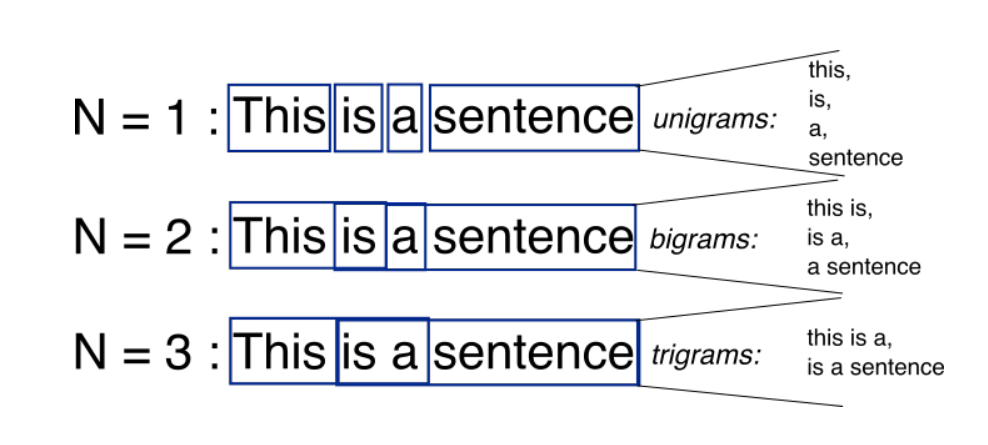

In [17]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and I want to ngramize it'

n = 2
sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
  print(grams)

('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'I')
('I', 'want')
('want', 'to')
('to', 'ngramize')
('ngramize', 'it')



#### Prediction-based embeddings

Prediction-based embeddings are word representations derived from models that are trained to predict certain aspects of a word's context or neighboring words. Unlike frequency-based embeddings that focus on word occurrence statistics, prediction-based embeddings capture semantic relationships and contextual information, providing richer representations of word meanings.

##### Word2Vec

Word2Vec embeddings place similar words near each other in vector space, capturing relationships between them. For example, the model can understand that 'man' is to 'woman' as 'king' is to 'queen,' showing how words relate through meaning. This ability to recognize patterns and analogies is a big advantage of Word2Vec.

![Pasted image 20241109040300.png](<attachment:Pasted image 20241109040300.png>)

---

**Semantic Similarity Example**

Man + Women = King + Queen

King - Man + Women = Queen


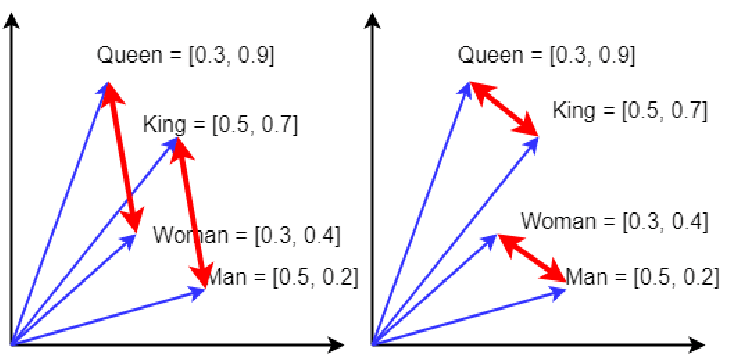


King = [0.5, 0.7]
Man = [0.5, 0.2]
Woman = [0.3, 0.4]
Queen = [0.3, 0.9]


King - Man = [0.5, 0.7] - [0.5, 0.2] = [0.0, 0.5]
King - Man + Woman = [0.0, 0.5] + [0.3, 0.4] = [0.3, 0.9]


[0.3, 0.9] matches Queen.


---


**Similarity Example**


$$
\text{Cosine Similarity} = \frac{\sum_{i=1}^n A_i B_i}{\sqrt{\sum_{i=1}^n A_i^2} \cdot \sqrt{\sum_{i=1}^n B_i^2}}
$$

|         | hello | world |
|---------|-------|-------|
| hello   |   1   |   0   |
| world   |   0   |   1   |

***Cosine Similarity:***

$$
\text{Cosine Similarity} = \frac{0 \cdot 1 + 1 \cdot 0}{\sqrt{0^2 + 1^2} \cdot \sqrt{1^2 + 0^2}} = 0
$$

|         | hello | world |
|---------|-------|-------|
| hello   |   1   |   1   |

***Cosine Similarity:***

$$
\text{Cosine Similarity} = \frac{1 \cdot 1 + 1 \cdot 1}{\sqrt{1^2 + 1^2} \cdot \sqrt{1^2 + 1^2}} = \frac{2}{2} = 1
$$

---

Word2Vec consists of two main models for generating vector representations: Continuous Bag of Words (CBOW) and Continuous Skip-gram. 


![Pasted image 20241021001505.png](<attachment:Pasted image 20241021001505.png>)

In the context of Word2Vec, the **Continuous Bag of Words (CBOW) model** aims to predict a target word based on its surrounding context words within a given window. It uses the context words to predict the target word, and the learned embeddings capture semantic relationships between words.

The **Continuous Skip-gram model**, on the other hand, takes a target word as input and aims to predict the surrounding context words.

##### Limitations of Word2Vec

Do you know the Ozone Layer?

Using **Word2Vec**, let's examine the associations for "Ozone":

| Word  | Human | Food | Liquid | Chemical |
| ----- | ----- | ---- | ------ | -------- |
| Cake  | 0.0   | 0.9  | 0.1    | 0.0      |
| Juice | 0.0   | 0.5  | 0.9    | 0.0      |
| Acid  | 0.0   | 0.0  | 0.1    | 0.9      |
| Ozone | 0.0   | 0.7  | 0.0    | 0.1      |

![Pasted image 20241009234647.png](<attachment:Pasted image 20241009234647.png>)


"Ozone" is type of Food

This example shows that **Word2Vec can make associations** based on statistical relationships in text, but it lacks real-world understanding of concepts. Here, "Ozone" is incorrectly associated with "Food," despite being a gas.



Another limitation of Word2Vec is its inability to distinguish specific subtypes within a category. For instance, **different types of coffee** like espresso and cappuccino may be interpreted as nearly identical due to the small cosine distance between them, even though they are distinct.

![Pasted image 202410050657.jpg](<attachment:Pasted image 202410050657.jpg>)


This highlights that while Word2Vec captures statistical patterns, it doesn’t fully understand nuanced distinctions between items within a category.
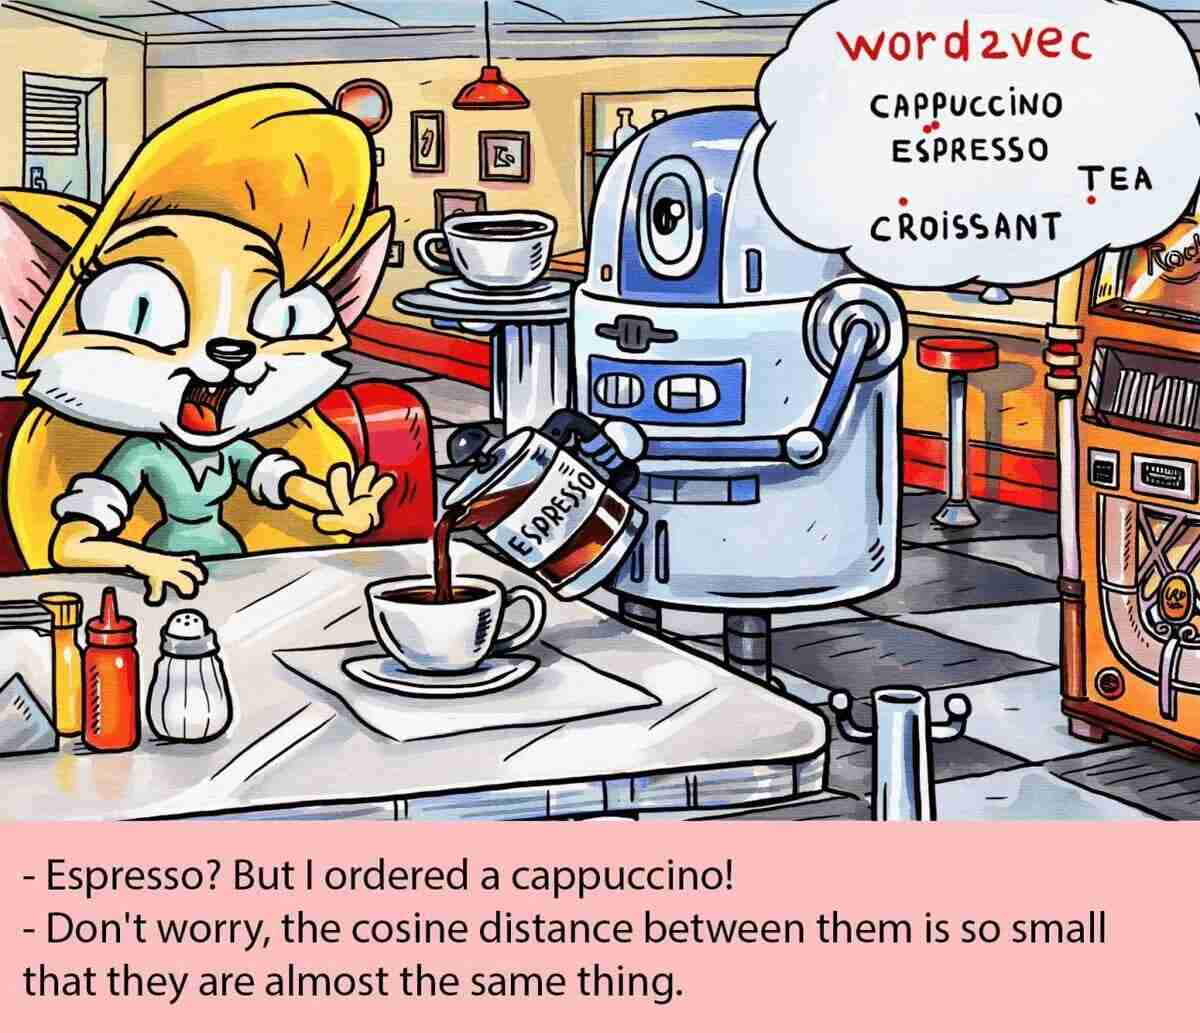
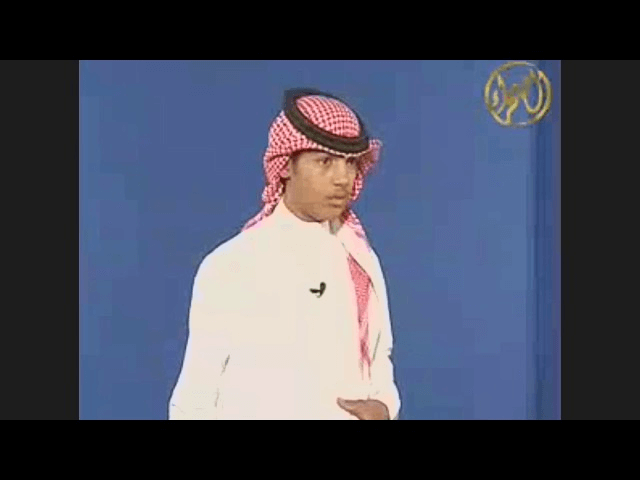
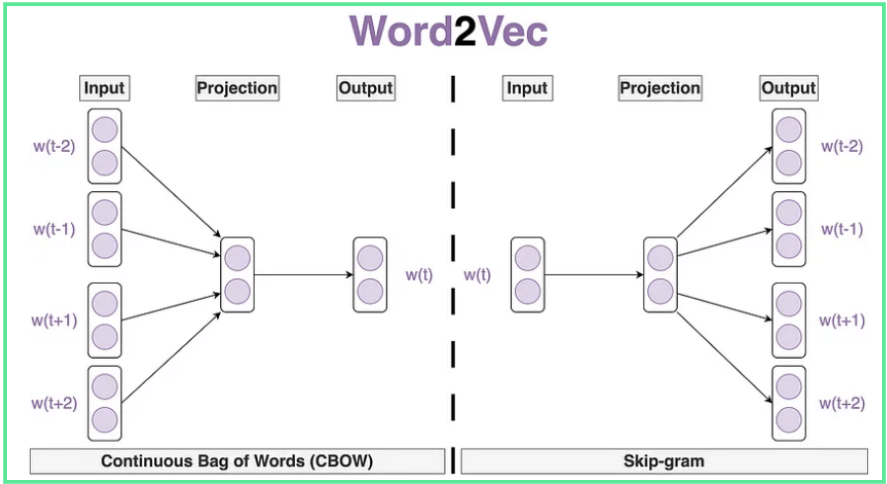
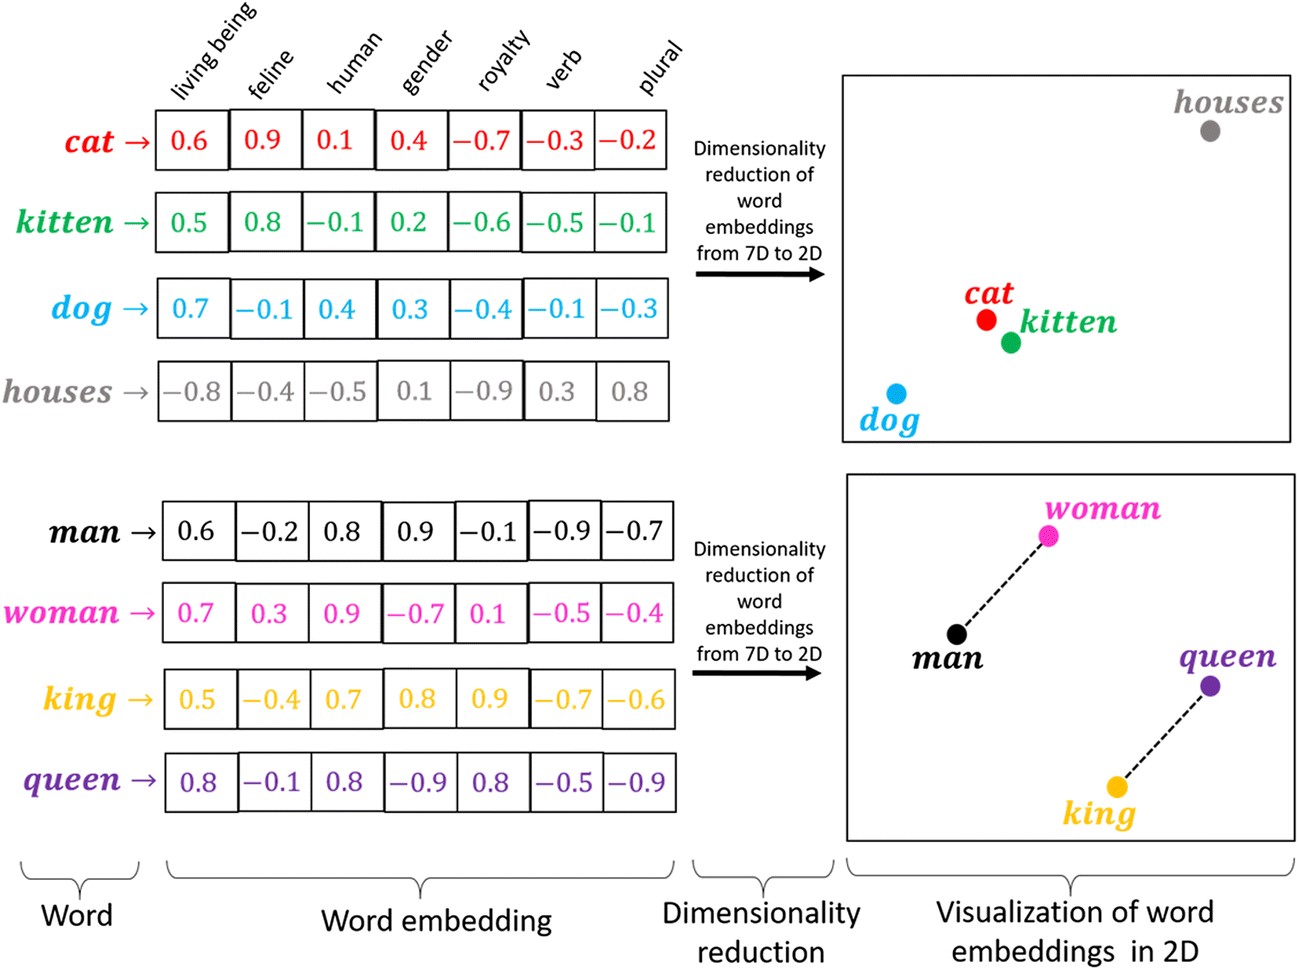

In [48]:
import gensim


Here we train a word embedding using the Brown Corpus:

In [49]:
import nltk
nltk.download('brown')

from nltk.corpus import brown

train_set = brown.sents()[:10000]
model = gensim.models.Word2Vec(train_set)


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Riyadh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


It might take some time to train the model. So, after it is trained, it can be saved as follows:

In [50]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

The model will be the list of words with their embedding. We can easily get the vector representation of a word.


In [ ]:
len(new_model.wv['university'])

There are some supporting functions already implemented in Gensim to manipulate with word embeddings. For example, to compute the cosine similarity between 2 words:

In [54]:
new_model.wv.similarity('university','school') > 0.9

True

Visualize the model

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_vectors = tsne.fit_transform(word_vectors)

import pandas as pd
tsne_df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
tsne_df['word'] = words

fig = px.scatter(tsne_df.head(200), x='x', y='y', text='word', title="t-SNE visualization of Word2Vec")
fig.update_traces(textposition='top center', marker=dict(size=8))
fig.show()

**Using the pre-trained model**

NLTK includes a pre-trained model which is part of a model that is trained on 100 billion words from the Google News Dataset. The full model is from https://code.google.com/p/word2vec/ (about 3 GB).

In [57]:
nltk.download('word2vec_sample')

from nltk.data import find

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)


[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\Riyadh\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


We pruned the model to only include the most common words (~44k words).

In [ ]:
len(model)

43981


Each word is represented in the space of 300 dimensions:


In [ ]:
len(model['university'])

300


Finding the top n words that are similar to a target word is simple. The result is the list of n words with the score.


In [39]:
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918290138245),
 ('faculty', 0.6780906319618225),
 ('undergraduate', 0.6587095856666565)]

Finding a word that is not in a list is also supported, although, implementing this by yourself is simple

In [41]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

"King - Man + Woman" is close to "Queen" and "Germany - Berlin + Paris" is close to "France"


In [58]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118194103240967)]

In [42]:
model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884091138839722)]

##### GloVe

Unlike the Word2Vec models (CBOW and Skip-gram), which focus on predicting context words given a target word or vice versa, GloVe uses a different approach that involves optimizing word vectors based on their co-occurrence probabilities. The training process is designed to learn embeddings that effectively capture the semantic relationships between words.

[Continue reading](https://github.com/stanfordnlp/glove)

In [ ]:
# No code

##### BERT

**BERT (Bidirectional Encoder Representations from Transformers)** is a model that creates context-aware embeddings by reading text in both directions. Unlike simpler embeddings, BERT can understand words based on the surrounding words, handling polysemy (multiple meanings) and capturing deep semantic relationships.

- **Bidirectional**: Analyzes each word with both left and right context, providing a fuller understanding of meaning.
- **Handles Polysemy and Synonymy**: Differentiates meanings based on context, useful for tasks like question answering and sentiment analysis.
- **Pretrained**: Trained on massive text data, making it adaptable to various language tasks.

BERT's embeddings are widely used in NLP tasks where deep contextual understanding is required.

[Continue reading](https://huggingface.co/docs/transformers/en/model_doc/bert)

In [ ]:
# No code


## Comparison of Word Embedding Techniques

| Feature                       | Count Vectorization | TF-IDF Vectorization | Word2Vec (CBOW, Skip-gram) | GloVe |
| ----------------------------- | ------------------- | -------------------- | -------------------------- | ----- |
| **Interpretable**             | ✅                   | ✅                    | ❌                          | ❌     |
| **Captures Semantic Meaning** | ❌                   | ❌                    | ✅                          | ✅     |
| **Sparse Representation**     | ✅                   | ✅                    | ❌                          | ❌     |
| **Handles Large Vocabulary**  | ❌                   | ❌                    | ✅                          | ✅     |
| **Context-Aware**             | ❌                   | ❌                    | ✅                          | ✅     |
| **Easy to Compute**           | ✅                   | ✅                    | ❌                          | ❌     |
| **Suitable for Short Text**   | ✅                   | ✅                    | ✅                          | ✅     |
| **Requires Large Dataset**    | ❌                   | ❌                    | ✅                          | ✅     |
| **Handles Synonymy**          | ❌                   | ❌                    | ✅                          | ✅     |
| **Handles Polysemy**          | ❌                   | ❌                    | ~                          | ~     |

In this table:
- **Polysemy Handling** (`~`): Word2Vec and GloVe can partially handle polysemy by capturing context to an extent, but they don’t fully differentiate meanings like contextual embeddings (e.g., BERT).

---
# Conclusion and Next Steps

In this guide, we've covered the essential components of Natural Language Processing, from text preprocessing to advanced word embeddings. Understanding these foundational steps is crucial for building powerful NLP models and tackling real-world language tasks.

This repository will include Jupyter notebooks to provide hands-on practice with these concepts. These notebooks will guide you through practical projects, such as building a sentiment classifier or performing named entity recognition. You'll also find tools and techniques for preprocessing text, implementing embeddings, and evaluating NLP models.

### What’s Next?
1. **Deepen Your Knowledge**: Continue exploring advanced topics in NLP, such as dependency parsing, topic modeling, and more sophisticated embeddings like contextualized embeddings (e.g., BERT).
2. **Practice with Real Data**: Applying these techniques on real datasets is the best way to solidify your understanding.
3. **Explore Other NLP Libraries**: After mastering NLTK, consider learning SpaCy or the Hugging Face Transformers library for modern NLP workflows.

With these resources and hands-on practice, you’ll be well-prepared to tackle more complex NLP projects and keep advancing your skills.


**Lab is over**

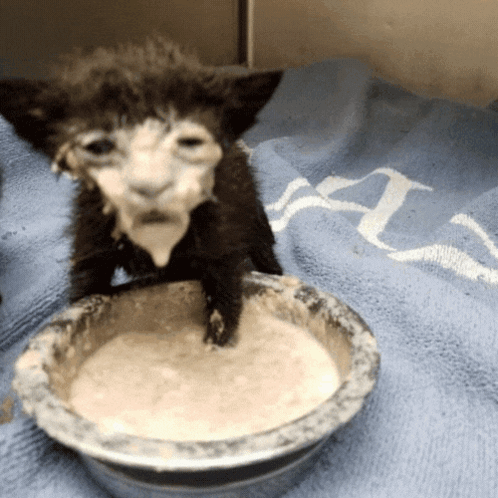

By [Riyadh Alghamdi](https://www.linkedin.com/in/riyadh-alghamdi-78313a252/)